# Credit Card Default Exercise

Primo esercizio del libro progetti di data science con python.

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\antonio.alvino\PycharmProjects\Data-Science-Projects-with-Python\Data\default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [3]:
df.shape

(30000, 25)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null object
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6             

In [6]:
df["default payment next month"].value_counts()

0    23438
1     6562
Name: default payment next month, dtype: int64

# Exercise 3: Verifying Basic Data Integrity
In this exercise, we will perform a basic check on whether our dataset contains what we expect and verify whether there are the correct number of samples.
The data are supposed to have observations for 30,000 credit accounts. While there are 30,000 rows, we should also check whether there are 30,000 unique account IDs. It's possible that, if the SQL query used to generate the data was run on an unfamiliar schema, values that are supposed to be unique are in fact not unique.


In [7]:
df["ID"].nunique()

29687

In [8]:
id_counts = df["ID"].value_counts()

In [9]:
# display the number of duplicates using another value_counts()
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Exercise 4: Verification of Data Integrity

In [10]:
dupe_mask = id_counts == 2

In [11]:
dupe_mask[0:5]

5edb4d2b-067c    True
7fe414ae-32f8    True
27e04c06-487f    True
f7fe4368-18e7    True
e850d228-6879    True
Name: ID, dtype: bool

In [12]:
dupe_mask.index[0:5]

Index(['5edb4d2b-067c', '7fe414ae-32f8', '27e04c06-487f', 'f7fe4368-18e7',
       'e850d228-6879'],
      dtype='object')

In [13]:
dupe_ids = id_counts.index[dupe_mask]

In [14]:
dupe_ids = list(dupe_ids)

In [15]:
len(dupe_ids)

313

In [16]:
dupe_ids[:5]

['5edb4d2b-067c',
 '7fe414ae-32f8',
 '27e04c06-487f',
 'f7fe4368-18e7',
 'e850d228-6879']

In [17]:
df.loc[df["ID"].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
17523,27e04c06-487f,200000,2,2,1,37,1,2,0,0,...,10155,12470,13571,0,2000,1155,2470,1265,0,0
17623,27e04c06-487f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22827,7fe414ae-32f8,400000,2,3,1,42,-1,-1,-1,-1,...,13088,28540,11860,10132,16932,13088,28540,11860,3978,0
22927,7fe414ae-32f8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27373,5edb4d2b-067c,450000,1,1,2,34,-1,-1,-1,-1,...,1745,0,7519,1830,1188,1745,0,7519,0,0
27473,5edb4d2b-067c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ogni ID ha una riga valorizzata ed una con tutti 0, verificare se è così per tutti i duplicati

In [18]:
# creare una matrice booleana dove df == 0
df_zero_mask = df == 0

In [19]:
# creare la serie booleana feature_zero_mask per tutte le entries che hanno 0 in tabella a partire dalla seconda colonna
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [20]:
feature_zero_mask[feature_zero_mask == True].sum()

315

In [21]:
# creo una copia del DB pulito dopo aver eliminato le entries con tutto a 0
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [22]:
df_clean_1["ID"].value_counts().value_counts()

1    29685
Name: ID, dtype: int64

## Exploring and cleaning the data

In [23]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

In [24]:
# PAY_1 è un object, ma ci aspettavamo un INT. 
df_clean_1["PAY_1"].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [25]:
# stando al data dictionary i valori con 0 non sono contemplati
df_clean_1["PAY_1"].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [26]:
valid_pay_mask = df_clean_1["PAY_1"] != "Not available"

In [27]:
valid_pay_mask.sum()

26664

In [28]:
# crea df pulita dai valori "Not available"
df_clean_2 = df_clean_1.loc[valid_pay_mask, :].copy()

In [29]:
df_clean_2.shape

(26664, 25)

In [30]:
df_clean_2["PAY_1"].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [31]:
df_clean_2["PAY_1"] = df_clean_2["PAY_1"].astype("int64")

In [32]:
df_clean_2[["PAY_1", "PAY_2"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


## Exercise 6: Exploring the Credit Limit and Demographic Features

In [33]:
import matplotlib.pyplot as plt #import plotting package
import seaborn as sns

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 200 #high resolution figures

In [34]:
# df_clean_2[["LIMIT_BAL", "AGE"]].hist()

In [35]:
df_clean_2[["LIMIT_BAL", "AGE"]].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [36]:
df_clean_2["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

Assign unknown categories to other.

In [37]:
df_clean_2["EDUCATION"].replace(to_replace=[0, 5, 6], value= 4, inplace= True)

In [38]:
df_clean_2["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [39]:
# start of marriage analysis
df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [40]:
df_clean_2["MARRIAGE"].replace(to_replace=0, value=3, inplace=True)

In [41]:
df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Deep Dive Categorical features

In [42]:
"""df_clean_2.groupby("EDUCATION").agg({"default payment next month": "mean"}).plot.bar(legend=False)
plt.ylabel("Default rate")
plt.xlabel("Education level: ordinal encoding")"""

'df_clean_2.groupby("EDUCATION").agg({"default payment next month": "mean"}).plot.bar(legend=False)\nplt.ylabel("Default rate")\nplt.xlabel("Education level: ordinal encoding")'

In [43]:
education_encoding = {1: "graduate school",
                      2: "university",
                      3: "high school",
                      4: "others"
                     }

In [44]:
df_clean_2["EDUCATION_CAT"] = df_clean_2["EDUCATION"].map(education_encoding)

In [45]:
df_clean_2["EDUCATION_CAT"].value_counts()

university         12458
graduate school     9412
high school         4380
others               414
Name: EDUCATION_CAT, dtype: int64

In [46]:
df_clean_2[["EDUCATION","EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


## Creating Dummy variables with OHE

Dummy variables are created with one hot encoding to avoid issues in ML models

In [47]:
edu_ohe = pd.get_dummies(df_clean_2["EDUCATION_CAT"])

In [48]:
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


### To check the OHE results we need to concatenate the two dataframes

In [49]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)

In [50]:
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']].head(10)

,EDUCATION_CAT,graduate school,high school,others,university
0,university,0,0,0,1
1,university,0,0,0,1
2,university,0,0,0,1
3,university,0,0,0,1
4,university,0,0,0,1
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,0,1
8,high school,0,1,0,0
9,high school,0,1,0,0


In [51]:
# save as .csv
df_with_ohe.to_csv("clean_dataset_ohe.csv", sep=";", index= False, float_format= "%.2f" )

# Exploring the Financial History Features in the Dataset

In [57]:
df = pd.read_csv(r"C:\Users\antonio.alvino\Desktop\Data Science\clean_dataset_ohe.csv", sep=";")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


At first let's look at the payment status of the past 6 months

In [60]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [65]:
pay_feats = df.columns[6:12]

In [68]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [70]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

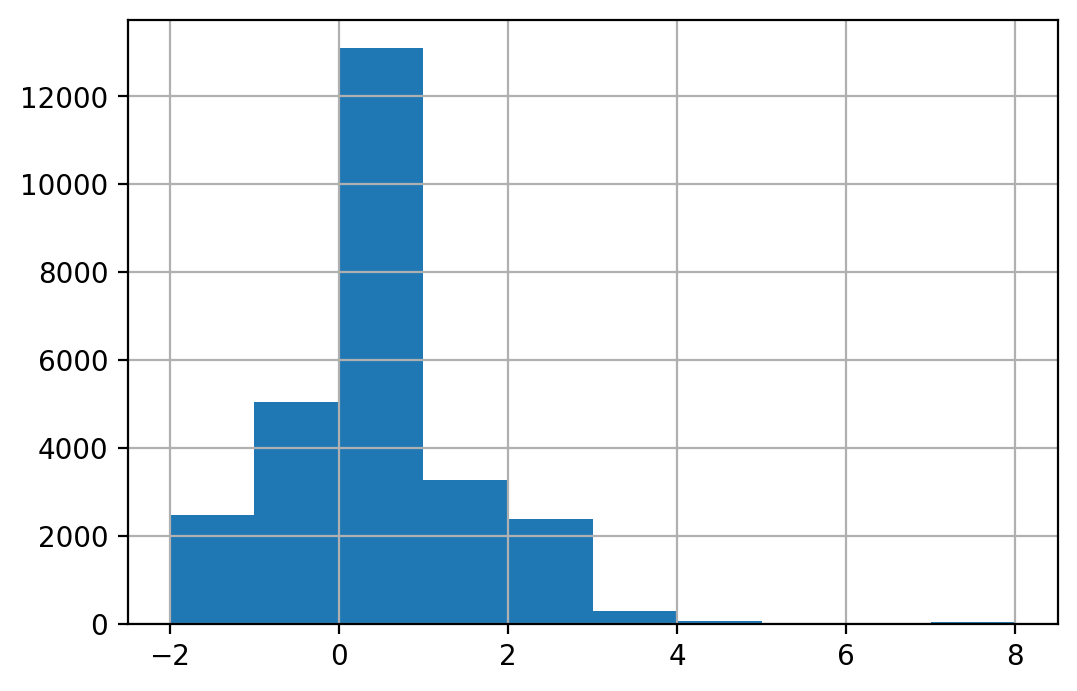

In [71]:
df[pay_feats[0]].hist()

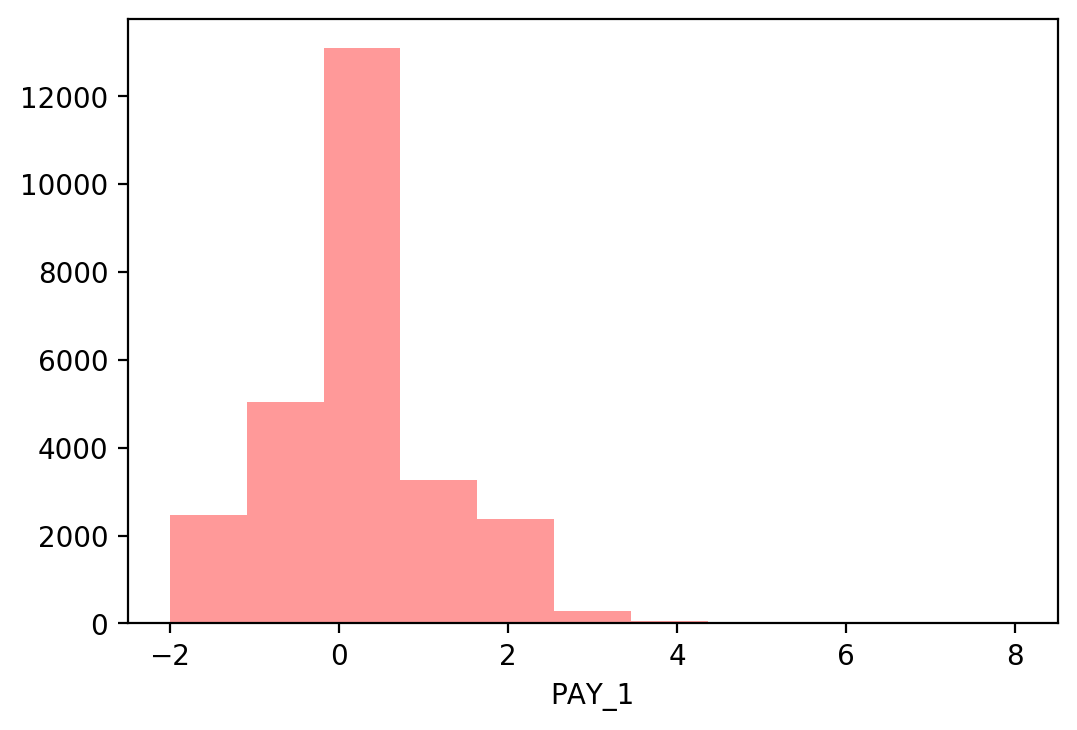

In [78]:
sns.distplot(df[pay_feats[0]], kde=False, bins=11, color="red")

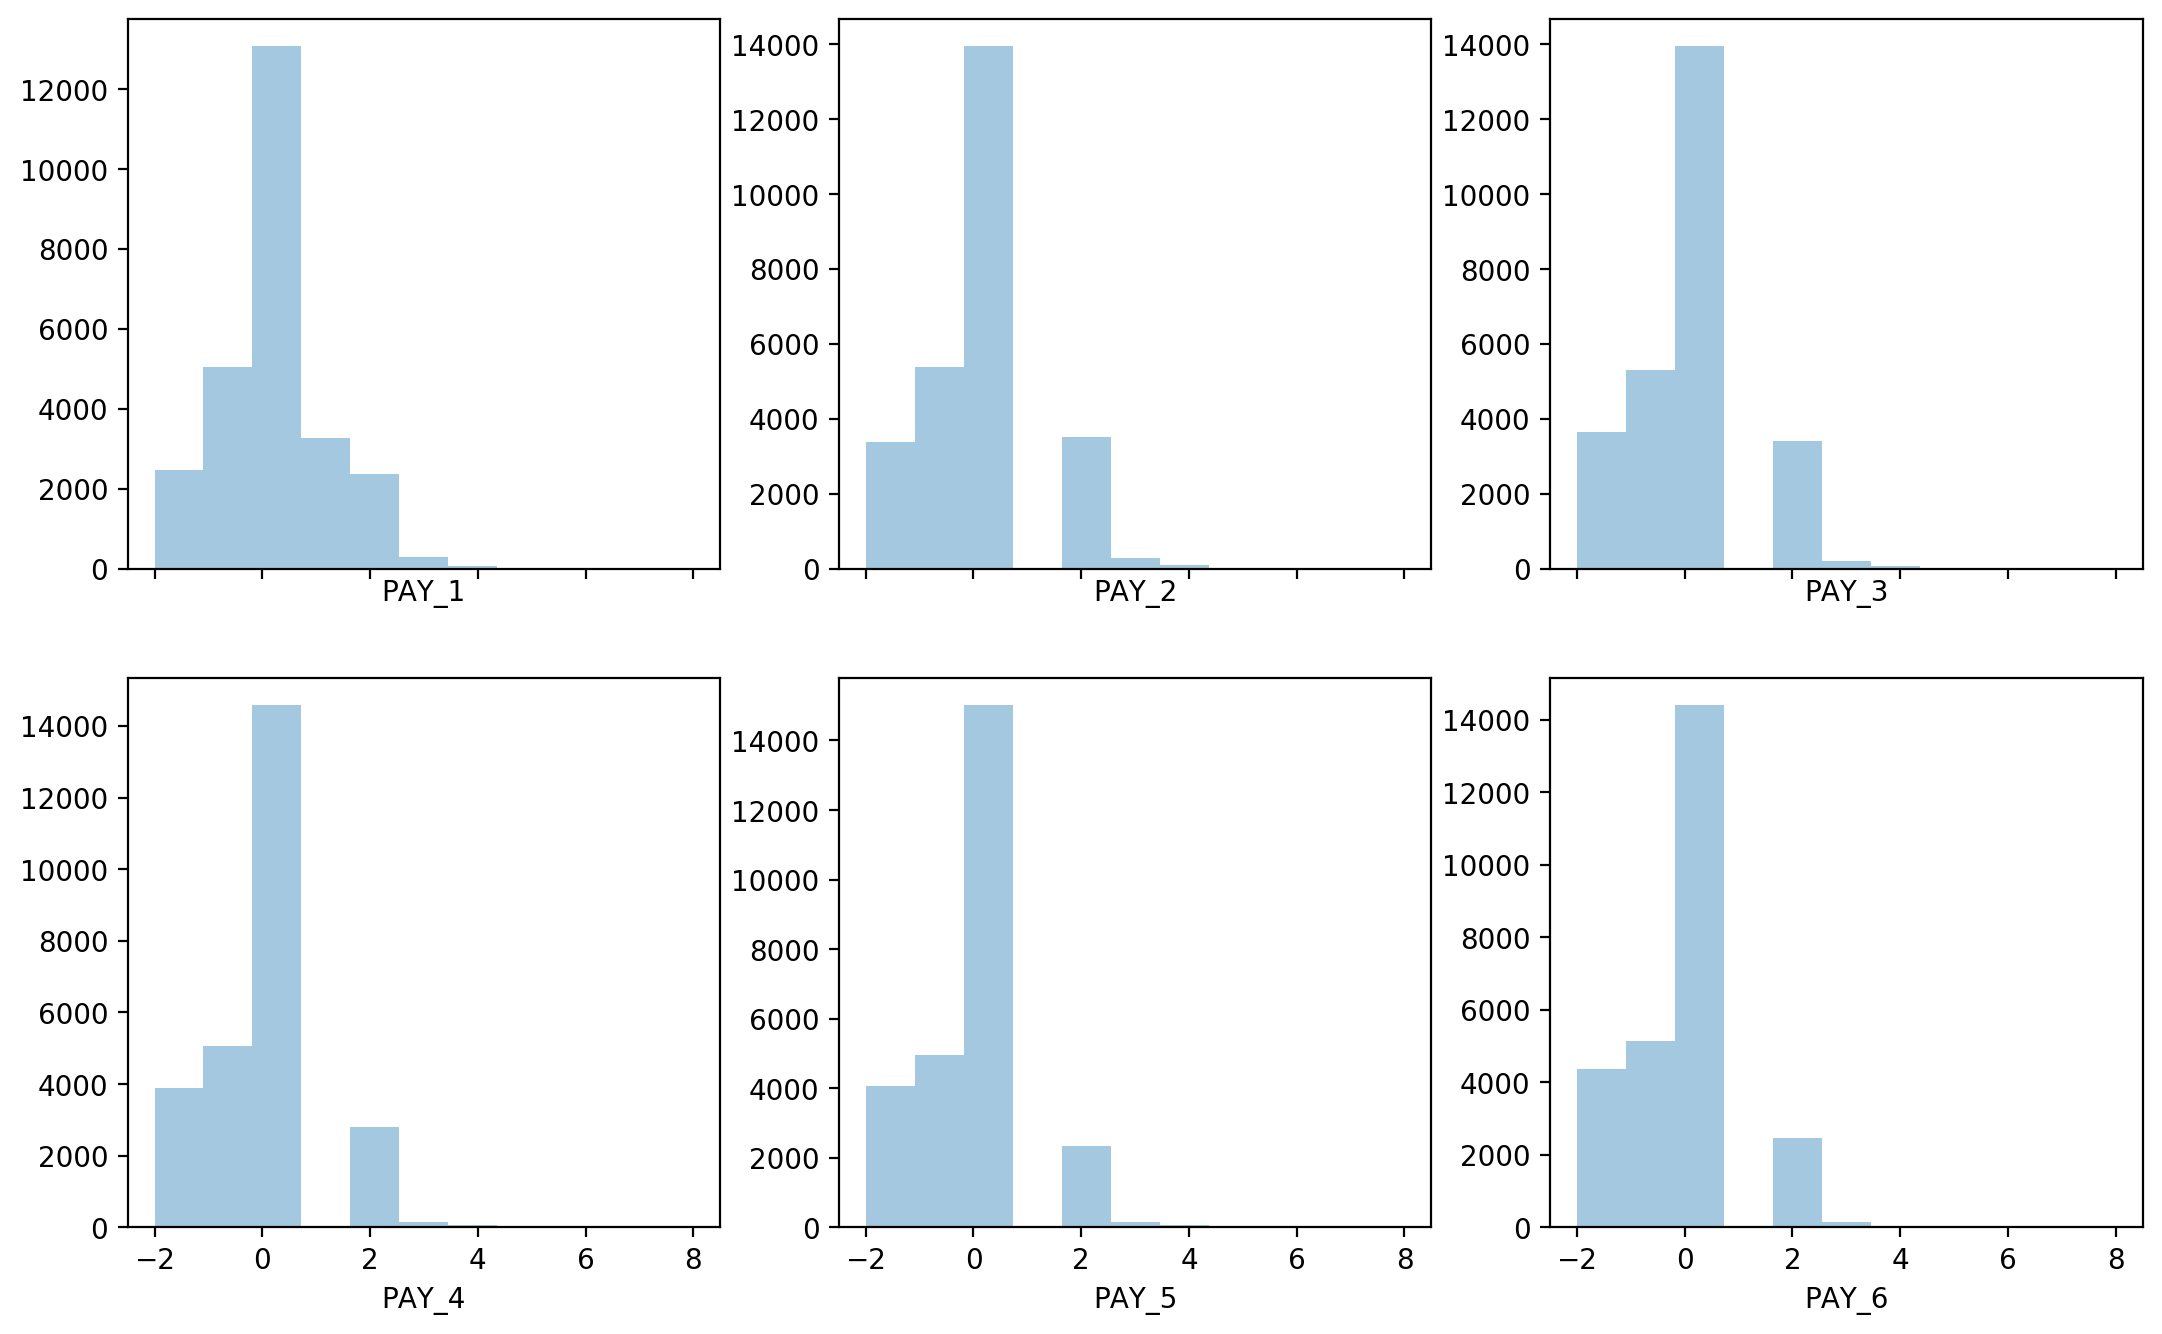

In [91]:
# plot
f, axes = plt.subplots(2, 3, figsize=(13, 8), sharex=True)

sns.distplot(df[pay_feats[0]], ax=axes[0, 0], kde=False, bins=11)
sns.distplot(df[pay_feats[1]], ax=axes[0, 1], kde=False, bins=11)
sns.distplot(df[pay_feats[2]], ax=axes[0, 2], kde=False, bins=11)
sns.distplot(df[pay_feats[3]], ax=axes[1, 0], kde=False, bins=11)
sns.distplot(df[pay_feats[4]], ax=axes[1, 1], kde=False, bins=11)
sns.distplot(df[pay_feats[5]], ax=axes[1, 2], kde=False, bins=11)

In [92]:
df.loc[df["PAY_2"] == 2, ["PAY_2", "PAY_3"]].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
